Initially we are importing necessary libraries.

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

In [2]:
import warnings
warnings.filterwarnings("ignore")    # To ignore warning messages

Now we need to read csv files pertaining to our exogenous variable for multivariate analysis. We have taken the weather data of Toronto city as exogenous variable for the year 2016 and 2017. 

In [ ]:
weather16 = pd.read_csv('D:/internships/summer_Triassic/WeatherData/Toronto16 - Copy.csv',usecols=['Date/Time','Mean Temp (°C)'] )

In [4]:
weather17 = pd.read_csv('D:/internships/summer_Triassic/WeatherData/Toronto17 - Copy.csv',usecols=['Date/Time','Mean Temp (°C)'] )

In [5]:
weather16.columns

Index(['Date/Time', 'Mean Temp (°C)'], dtype='object')

In [6]:
weather16 = weather16.rename(columns={'Date/Time':'DATE'}) # renaming the columns'Date/Time' to 'DATE'.

In [7]:
weather16['Mean Temp (°C)'].isnull().sum() # to know total number of NaN values in the column.

13

In [8]:
weather16[weather16['Mean Temp (°C)'].isnull()] # to know where all we have NaN values.

,DATE,Mean Temp (°C)
4,05-01-16,NaN
7,08-01-16,NaN
93,03-04-16,NaN
104,14-04-16,NaN
113,23-04-16,NaN
116,26-04-16,NaN
117,27-04-16,NaN
176,25-06-16,NaN
224,12-08-16,NaN
229,17-08-16,NaN


Since can't give NaN values for further analysis, we need to approximate  each of these data point. Here we are using backward filling technique as shown below.

In [9]:
weather16['Mean Temp (°C)'][4] = weather16['Mean Temp (°C)'][3]
weather16['Mean Temp (°C)'][7] = weather16['Mean Temp (°C)'][6]
weather16['Mean Temp (°C)'][93] = weather16['Mean Temp (°C)'][92]
weather16['Mean Temp (°C)'][104] = weather16['Mean Temp (°C)'][103]
weather16['Mean Temp (°C)'][113] = weather16['Mean Temp (°C)'][112]
weather16['Mean Temp (°C)'][116] = weather16['Mean Temp (°C)'][115]
weather16['Mean Temp (°C)'][117] = weather16['Mean Temp (°C)'][115]
weather16['Mean Temp (°C)'][176] = weather16['Mean Temp (°C)'][175]
weather16['Mean Temp (°C)'][224] = weather16['Mean Temp (°C)'][223]
weather16['Mean Temp (°C)'][229] = weather16['Mean Temp (°C)'][228]
weather16['Mean Temp (°C)'][265] = weather16['Mean Temp (°C)'][264]
weather16['Mean Temp (°C)'][313] = weather16['Mean Temp (°C)'][312]
weather16['Mean Temp (°C)'][365] = weather16['Mean Temp (°C)'][364]



In [10]:
weather16 # Counter-checking the values 

,DATE,Mean Temp (°C)
0,01-01-16,-1.1
1,02-01-16,-0.7
2,03-01-16,-3.9
3,04-01-16,-12.1
4,05-01-16,-12.1
5,06-01-16,-1.1
6,07-01-16,0.7
7,08-01-16,0.7
8,09-01-16,5.8
9,10-01-16,1.2


In [11]:
weather16 = weather16.set_index(['DATE']) # Setting 'DATE' as index.

In [12]:
times=pd.date_range(start='2016-01-01',periods=366) # Manualy describing the format and period of time series index.

In [13]:
weather16 =weather16.set_index(times) # reindexing the dataset with 'times'

But we only wanted data from 2016-03-06 to 2017-11-05. So, we need to trim the dataframe in such a way.

In [14]:
weather16 = weather16['2016-03-06':]

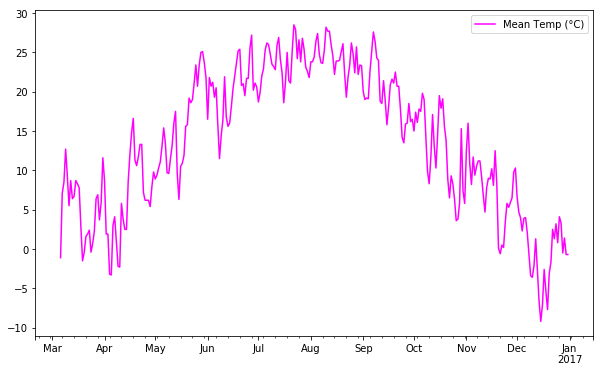

In [15]:
weather16.plot(figsize = (10,6), color ='magenta') # plotting the weather data for the year 2016. 

We need to do the same steps for the year 2017, and are given below.

In [44]:
weather17['Mean Temp (°C)'].isnull().sum() # to know total number of NaN values in the column.

0

In [45]:
weather17 = weather17.rename(columns = {'Date/Time':'DATE'})

In [18]:
# printing NaN values. 
weather17[weather17['Mean Temp (°C)'].isnull()]

,DATE,Mean Temp (°C)
64,06-03-17,NaN
100,11-04-17,NaN
137,18-05-17,NaN
141,22-05-17,NaN
142,23-05-17,NaN
148,29-05-17,NaN
157,07-06-17,NaN
302,30-10-17,NaN
310,07-11-17,NaN
330,27-11-17,NaN


In [19]:
# replacing NaN values with backward filling.
weather17['Mean Temp (°C)'][64]=weather17['Mean Temp (°C)'][63]
weather17['Mean Temp (°C)'][100]=weather17['Mean Temp (°C)'][99]
weather17['Mean Temp (°C)'][137]=weather17['Mean Temp (°C)'][136]
weather17['Mean Temp (°C)'][141]=weather17['Mean Temp (°C)'][140]
weather17['Mean Temp (°C)'][142]=weather17['Mean Temp (°C)'][140]
weather17['Mean Temp (°C)'][148]=weather17['Mean Temp (°C)'][147]
weather17['Mean Temp (°C)'][157]=weather17['Mean Temp (°C)'][156]
weather17['Mean Temp (°C)'][302]=weather17['Mean Temp (°C)'][301]
weather17['Mean Temp (°C)'][310]=weather17['Mean Temp (°C)'][309]
weather17['Mean Temp (°C)'][330]=weather17['Mean Temp (°C)'][329]

In [20]:
weather17 = weather17.set_index('DATE')

In [21]:
times1=pd.date_range(start='2017-01-01', end='2017-12-31', periods =365)

In [22]:
weather17 =weather17.set_index(times1)

In [24]:
weather17 = weather17[:'2017-11-05'] # We only need data upto 2017-11-05.

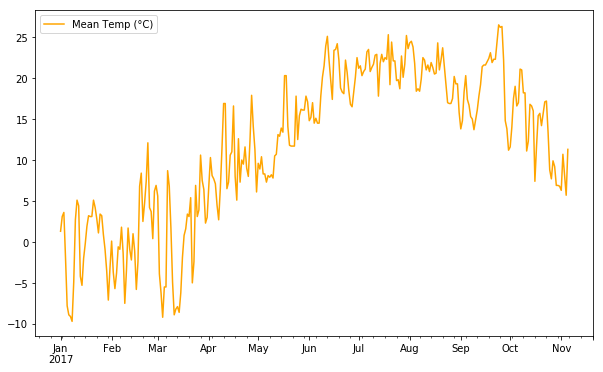

In [25]:
weather17.plot(figsize=(10,6),color='orange')

Now we need to concatenate the two dataset to make it one continuous data.

In [26]:
w1617 = pd.concat([weather16, weather17],axis =0)

In [27]:
# Scaling the data.
w1617 = w1617/(w1617.max())

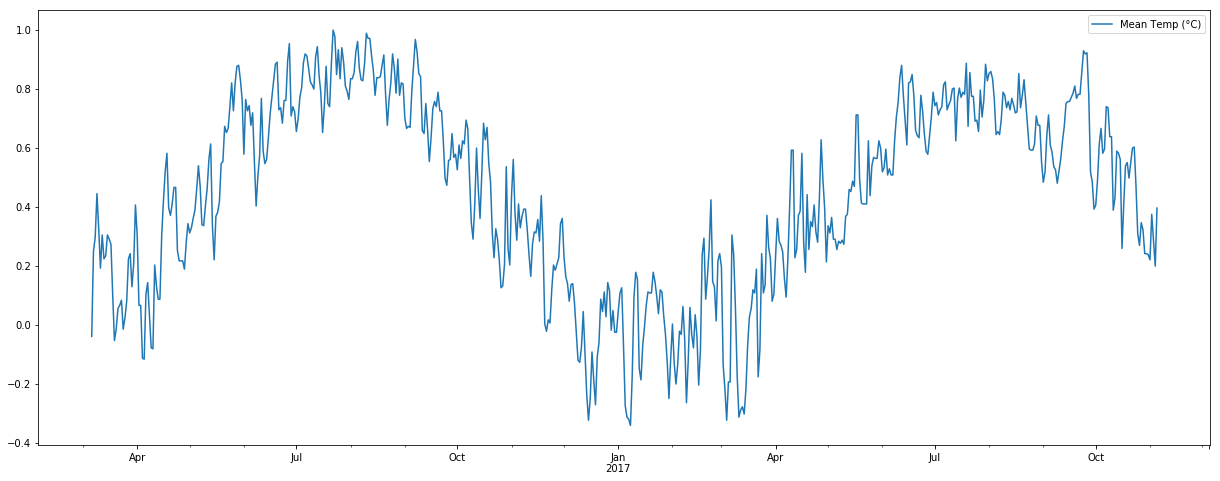

In [28]:
w1617.plot(figsize=(21,8)) # plotting.

SARIMAX implementation

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
import itertools
import time
from datetime import datetime

In [30]:
# loading the original dataset.
hdr = pd.read_csv('D:/internships/summer_Triassic/dataset/original/csvfiles/SalesHDR.csv', header=0, 
                  usecols = [ 'NUMCUST' ,'DATESEATED'],parse_dates= ['DATESEATED'])

In [31]:
# Renaming the column DATESEATED to DATE.
hdr_new = hdr.rename(columns = {'DATESEATED':'DATE'})

In [32]:
# setting DATE column as index. 
hdr_new.set_index('DATE',inplace=True)

# snipping for continuous data only.
hdr_new = hdr_new.loc['2016-03-06':]

# sampling based on daily values.
hdr_new_sampled = hdr_new.resample('D').sum()

In [33]:
x = hdr_new_sampled 

In [34]:
x = x/(x.max())

Then we have to specify training and testing portion in the dataset.  

In [35]:
train, test = x[:520], x[520:]

The length of training data and exogenous data (weather data) should be equal. We counter check it as below.

In [36]:
print(len(w1617))
print(len(x))
print(w1617.shape)
print(x.shape)

610
610
(610, 1)
(610, 1)


In [37]:
exog_train = w1617[:520]
exog_test = w1617[520:]

In the earlier implementation of SARIMA, we've got best result for the range (0,2) in the order = (1,1,1) and seasonal_order =(0,1,1,7).

In [38]:
# fitting the model
model = SARIMAX(train, order = (1,1,1),seasonal_order =(0,1,1,7),exog = exog_train, enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit(disp=False)

C:\Users\sandeep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [39]:
# prediction based on the model
pred = model_fit.predict(len(train), len(train)+len(test)-1, exog = exog_test, dynamic = False)
print(pred.head())


2017-08-08    0.462965
2017-08-09    0.381713
2017-08-10    0.397584
2017-08-11    0.527109
2017-08-12    0.774409
Freq: D, dtype: float64


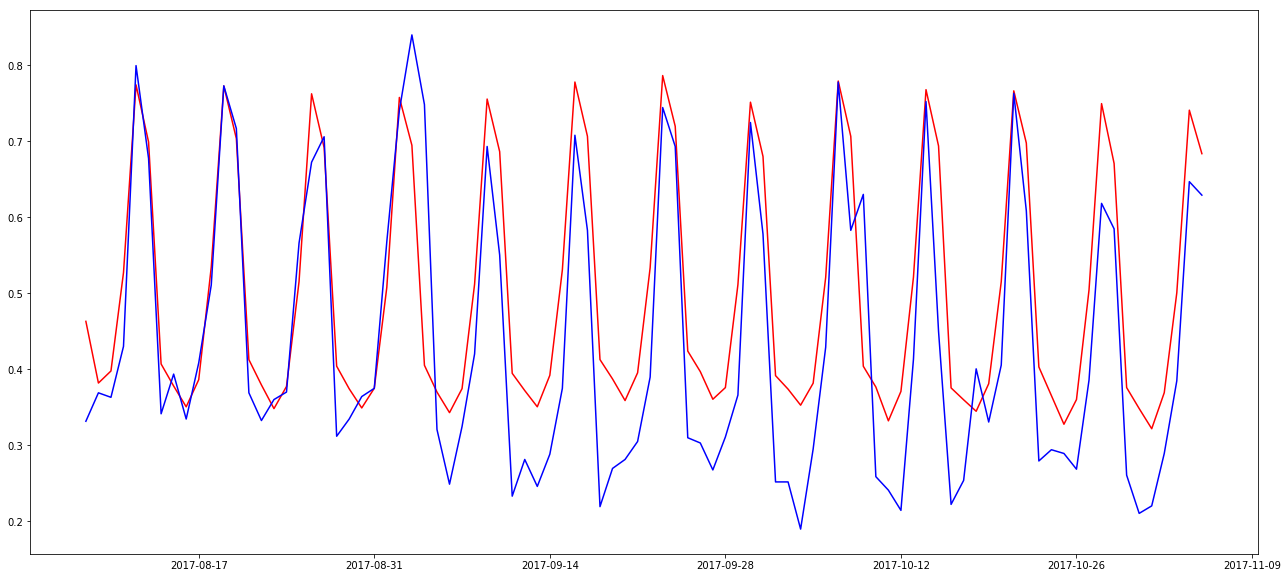

In [40]:
# plotting prediction and test 
plt.figure(figsize=(22,10))  
pyplot.plot(pred, color='red', label ='predicted')
pyplot.plot(test, color ='blue', label='test')

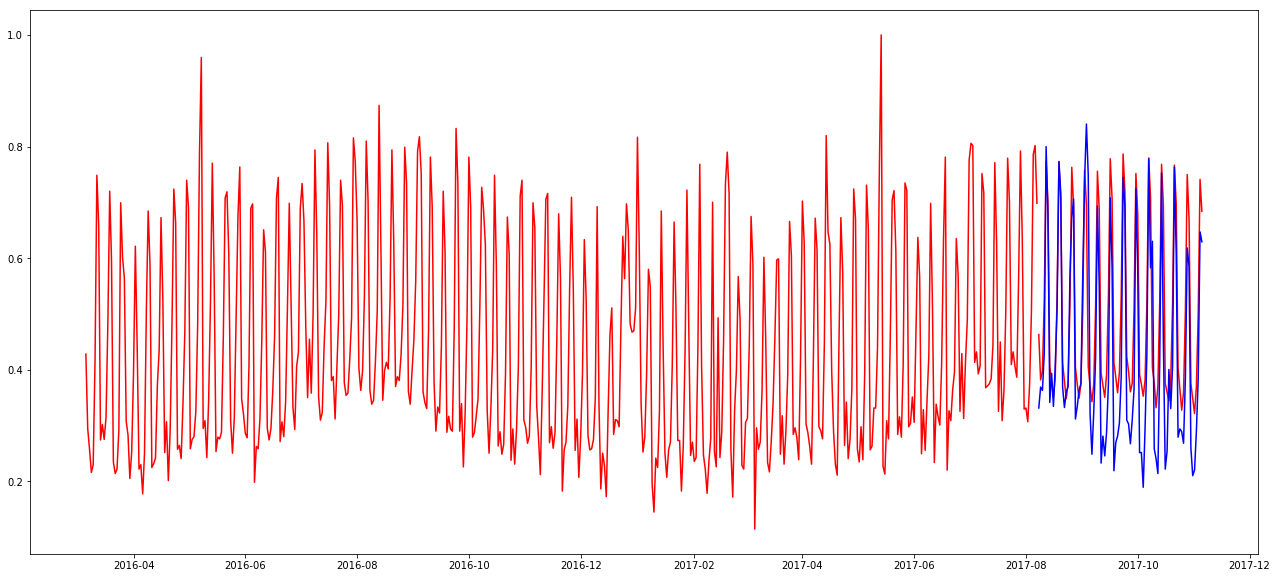

In [41]:
# visualization of train, test and prediction.
plt.figure(figsize=(22,10))  
pyplot.plot(pred, color='red')
pyplot.plot(test, color ='blue')
pyplot.plot(train, color ='red')

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
print('SARIMAX model MSE:{}'.format(mean_squared_error(test,pred)))

SARIMAX model MSE:0.010793678017791077


Thus the error in the scaled data is reduced and more accurate results can be inferred by implementing SARIMAX.